<a href="https://colab.research.google.com/github/lathigaa/Abstractive-Text-Summarization-BART/blob/main/text_summarizer_bart_model_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from rouge_score import rouge_scorer
import numpy as np

In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

long_text = """
    Google Colab is a product from Google Research, which allows anyone to write and execute arbitrary Python code
    in the browser, with zero configuration required, free access to GPUs, and easy sharing. It is widely used by
    data scientists and machine learning engineers for its ease of use and the powerful resources it provides,
    especially when working with large datasets and deep learning models. The ability to run code in a cloud
    environment, paired with integrated tools for data analysis and visualization, makes Colab a preferred platform
    for many. It supports libraries such as TensorFlow, PyTorch, and Keras, allowing users to build complex machine
    learning models. Additionally, Google Colab allows users to import their datasets from Google Drive, making it
    easy to work with various types of data. While Colab offers free access to computing resources, users can also
    upgrade to Colab Pro for additional resources and enhanced performance. This flexibility and scalability make Colab
    a versatile tool for research, prototyping, and development in various domains, including natural language processing,
    computer vision, and data science. Despite its many advantages, there are some limitations, such as the free version's
    limited runtime and resource allocation, which may impact users working with large models or long-running jobs.
    However, with its ease of use and strong integration with other Google services, Colab continues to be a valuable tool
    for both novice and experienced practitioners.
"""

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:

summary = summarizer(long_text, max_length=200, min_length=50, do_sample=False)

summarized_text = summary[0]['summary_text']
print("Summarized Text:\n", summarized_text)


Summarized Text:
 Google Colab allows anyone to write and execute arbitrary Python code in the browser. It supports libraries such as TensorFlow, PyTorch, and Keras, allowing users to build complex machine learning models. Users can also upgrade to Colab Pro for additional resources and enhanced performance.


In [ ]:

def compute_rouge(reference, prediction):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, prediction)
    return scores

reference_summary = """
    Google Colab is a cloud-based platform by Google Research that allows users to write and execute Python code in a
    browser. It provides free access to GPUs, integrates with tools like TensorFlow and PyTorch, and allows importing
    datasets from Google Drive. Colab is widely used for machine learning, data analysis, and research. It offers
    flexibility for users working with large models, although there are some limitations in the free version related to
    runtime and resource allocation.
"""

rouge_scores = compute_rouge(reference_summary, summarized_text)

print("\nROUGE Scores:")
print("ROUGE-1:", rouge_scores['rouge1'])
print("ROUGE-2:", rouge_scores['rouge2'])
print("ROUGE-L:", rouge_scores['rougeL'])



ROUGE Scores:
ROUGE-1: Score(precision=0.6363636363636364, recall=0.36363636363636365, fmeasure=0.4628099173553719)
ROUGE-2: Score(precision=0.27906976744186046, recall=0.15789473684210525, fmeasure=0.20168067226890754)
ROUGE-L: Score(precision=0.4772727272727273, recall=0.2727272727272727, fmeasure=0.3471074380165289)


<ipython-input-11-3e78b59ebff7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="Blues_d")


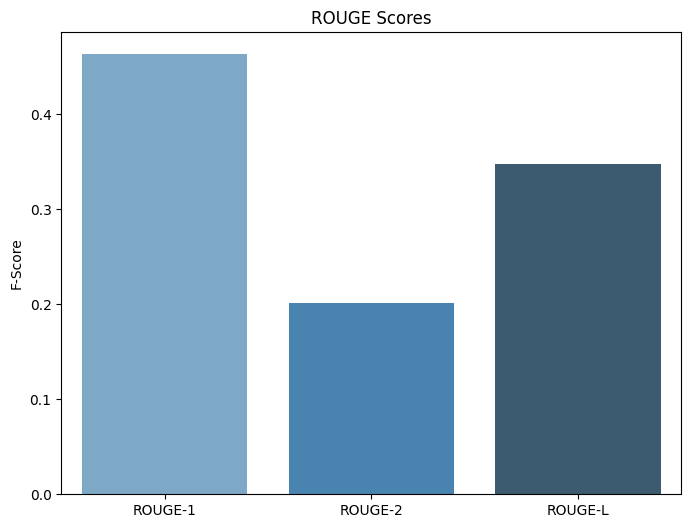

In [ ]:
def plot_rouge_scores(scores):
    labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
    values = [scores['rouge1'].fmeasure, scores['rouge2'].fmeasure, scores['rougeL'].fmeasure]

    plt.figure(figsize=(8, 6))
    sns.barplot(x=labels, y=values, palette="Blues_d")
    plt.title("ROUGE Scores")
    plt.ylabel("F-Score")
    plt.show()

plot_rouge_scores(rouge_scores)

In [ ]:
import nltk
from nltk.probability import FreqDist
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

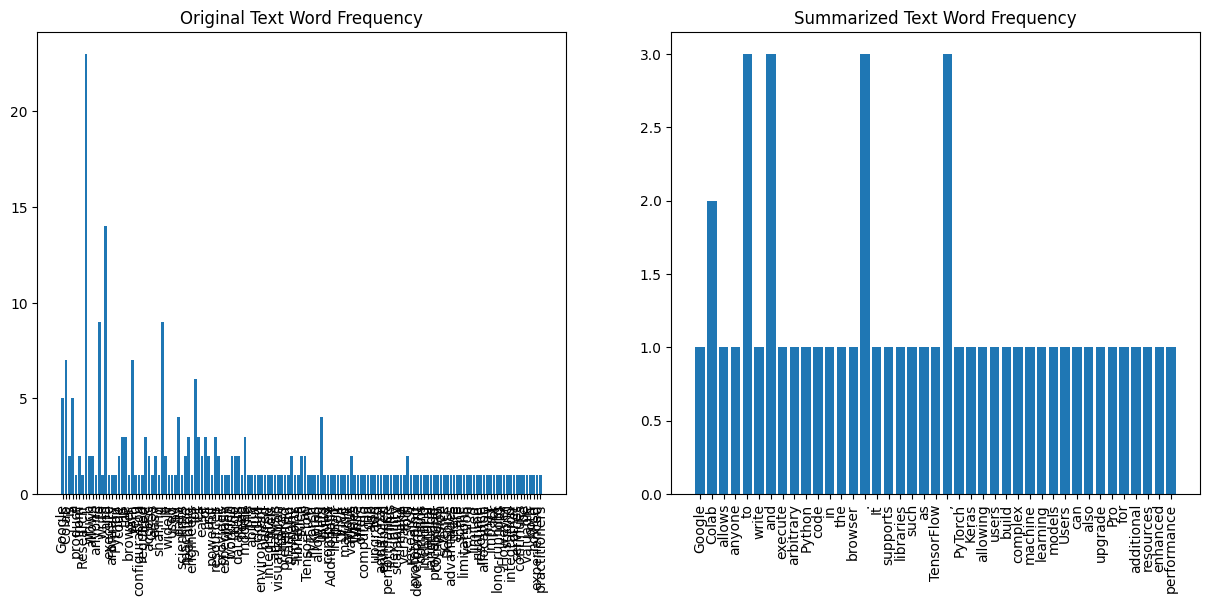

In [ ]:
tokens_original = nltk.word_tokenize(long_text)
tokens_summarized = nltk.word_tokenize(summarized_text)

fdist_original = FreqDist(tokens_original)
fdist_summarized = FreqDist(tokens_summarized)

def plot_word_frequency(fdist_original, fdist_summarized):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot for original text
    axes[0].bar(fdist_original.keys(), fdist_original.values())
    axes[0].set_title('Original Text Word Frequency')
    axes[0].tick_params(axis='x', rotation=90)

    # Plot for summarized text
    axes[1].bar(fdist_summarized.keys(), fdist_summarized.values())
    axes[1].set_title('Summarized Text Word Frequency')
    axes[1].tick_params(axis='x', rotation=90)

    plt.show()

plot_word_frequency(fdist_original, fdist_summarized)

In [ ]:
import numpy as np
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

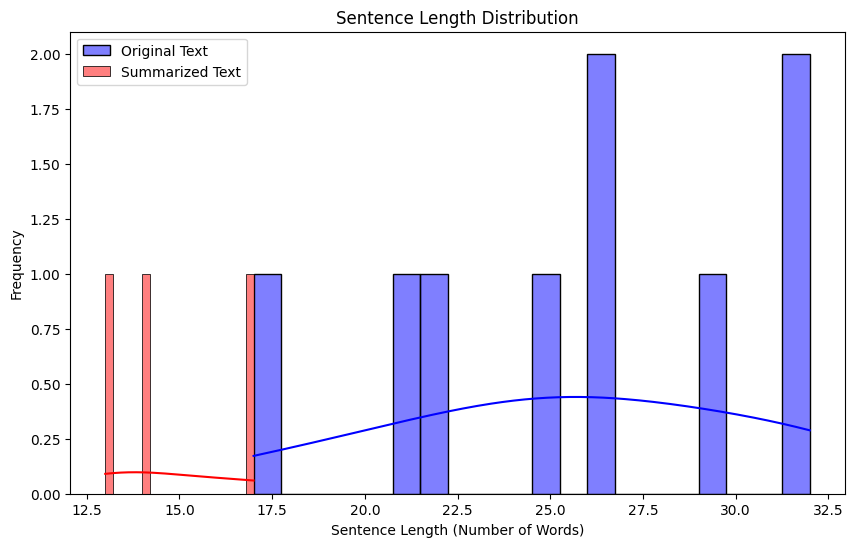

In [ ]:
sentences_original = sent_tokenize(long_text)
sentences_summarized = sent_tokenize(summarized_text)

sentence_lengths_original = [len(sentence.split()) for sentence in sentences_original]
sentence_lengths_summarized = [len(sentence.split()) for sentence in sentences_summarized]

                # plot sentence length distribution
def plot_sentence_length_distribution(original_lengths, summarized_lengths):
    plt.figure(figsize=(10, 6))
    sns.histplot(original_lengths, kde=True, color="blue", label="Original Text", bins=20)
    sns.histplot(summarized_lengths, kde=True, color="red", label="Summarized Text", bins=20)

    plt.title("Sentence Length Distribution")
    plt.xlabel("Sentence Length (Number of Words)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

plot_sentence_length_distribution(sentence_lengths_original, sentence_lengths_summarized)

In [ ]:
summarizer_t5 = pipeline("summarization", model="t5-large")

summary_bart = summarizer(long_text, max_length=200, min_length=50, do_sample=False)
summary_t5 = summarizer_t5(long_text, max_length=200, min_length=50, do_sample=False)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


<ipython-input-19-33f4fe98caa0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rouge1_scores, palette="viridis")


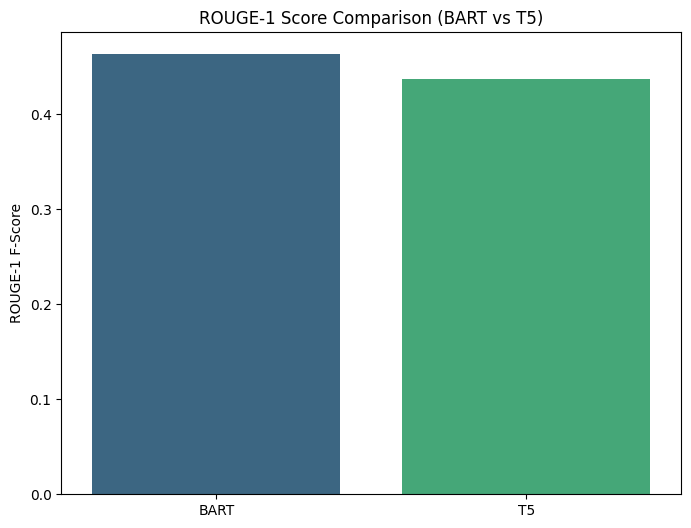


Mean ROUGE-1 F-Score for BART and T5: 0.44989235363566915


In [ ]:
# compute rouge scores for both models
rouge_scores_bart = compute_rouge(reference_summary, summary_bart[0]['summary_text'])
rouge_scores_t5 = compute_rouge(reference_summary, summary_t5[0]['summary_text'])

def plot_rouge_comparison(rouge_bart, rouge_t5):
    models = ['BART', 'T5']
    rouge1_scores = [rouge_bart['rouge1'].fmeasure, rouge_t5['rouge1'].fmeasure]

    plt.figure(figsize=(8, 6))
    sns.barplot(x=models, y=rouge1_scores, palette="viridis")
    plt.title("ROUGE-1 Score Comparison (BART vs T5)")
    plt.ylabel("ROUGE-1 F-Score")
    plt.show()

plot_rouge_comparison(rouge_scores_bart, rouge_scores_t5)

def mean_rouge_scores(*scores):
    mean_rouge = np.mean([score['rouge1'].fmeasure for score in scores])
    return mean_rouge

mean_rouge = mean_rouge_scores(rouge_scores_bart, rouge_scores_t5)
print(f"\nMean ROUGE-1 F-Score for BART and T5: {mean_rouge}")
